In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
path = "Resources/cleaned_data.csv"
data_df = pd.read_csv(path)

In [3]:
data_df.head(10)

,Unnamed: 0,Participant,Date,Day,Time,Notification.No,Responded,Completed.Session,Session.Instance,Reminders.Delivered,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active
0,0,115091,05/02/2017,Tuesday,10:00:06,1,1,1,1.0,0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0
1,1,115091,05/02/2017,Tuesday,12:02:48,2,1,1,2.0,0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0
2,2,115091,05/02/2017,Tuesday,14:03:02,3,1,1,3.0,0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0
3,3,115091,05/02/2017,Tuesday,16:34:28,4,1,1,4.0,0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0
4,5,115091,05/02/2017,Tuesday,20:02:12,6,1,1,5.0,0,...,0.0,27.0,83.0,15.0,3.0,25.0,16.0,10,0.0,0.0
5,6,115091,05/02/2017,Tuesday,22:01:31,7,1,1,6.0,0,...,0.0,44.0,72.0,25.0,17.0,52.0,6.0,2,8.0,1.0
6,7,115091,05/03/2017,Wednesday,10:02:28,1,1,1,7.0,0,...,19.0,59.0,38.0,13.0,15.0,25.0,57.0,61,21.0,57.0
7,8,115091,05/03/2017,Wednesday,12:04:05,2,1,1,8.0,0,...,8.0,64.0,61.0,11.0,19.0,21.0,16.0,18,10.0,16.0
8,10,115091,05/03/2017,Wednesday,16:17:52,4,1,1,9.0,0,...,25.0,63.0,66.0,9.0,18.0,69.0,55.0,18,4.0,25.0
9,11,115091,05/03/2017,Wednesday,18:06:06,5,1,1,10.0,0,...,29.0,69.0,81.0,17.0,15.0,61.0,69.0,61,20.0,15.0


In [4]:
relevant_participants = [131183,
680605,
883656,
3519030,
3939906,
3966074,
4025837,
4426159,
4545717,
4620015,
4804938,
5485419,
5625691,
5720405,
6203827,
7027026,
7345751,
7949149,
8039514,
8114008,
8353768,
8810136,
9076249,
9464374]
ariana_df = data_df[data_df['Participant'].isin(relevant_participants)]

In [5]:
days = []
for index, row in ariana_df.iterrows():
    if row['Date'] == '05/22/2017':
        days.append("Day of Manchester Bombing")
    else:
        days.append("Normal Days")

ariana_df['Timestamp'] = ariana_df['Date'] + " " + ariana_df['Time']
ariana_df['News Day'] = days


ariana_df

,Unnamed: 0,Participant,Date,Day,Time,Notification.No,Responded,Completed.Session,Session.Instance,Reminders.Delivered,...,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active,Timestamp,News Day
77,98,131183,05/11/2017,Thursday,10:03:02,1,1,1,1.0,0,...,64.0,0.0,0.0,57.0,62.0,60,0.0,61.0,05/11/2017 10:03:02,Normal Days
78,101,131183,05/11/2017,Thursday,16:20:46,4,1,1,2.0,0,...,21.0,0.0,0.0,64.0,43.0,8,0.0,7.0,05/11/2017 16:20:46,Normal Days
79,102,131183,05/11/2017,Thursday,18:04:17,5,1,1,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,05/11/2017 18:04:17,Normal Days
80,103,131183,05/11/2017,Thursday,20:03:16,6,1,1,4.0,0,...,0.0,0.0,0.0,61.0,54.0,58,0.0,66.0,05/11/2017 20:03:16,Normal Days
81,104,131183,05/11/2017,Thursday,22:33:16,7,1,1,5.0,0,...,60.0,0.0,0.0,0.0,60.0,26,63.0,66.0,05/11/2017 22:33:16,Normal Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,11652,9464374,05/24/2017,Wednesday,14:09:27,3,1,1,72.0,0,...,0.0,0.0,1.0,4.0,65.0,0,36.0,33.0,05/24/2017 14:09:27,Normal Days
8184,11653,9464374,05/24/2017,Wednesday,16:14:40,4,1,1,73.0,0,...,0.0,1.0,0.0,0.0,67.0,35,27.0,29.0,05/24/2017 16:14:40,Normal Days
8185,11654,9464374,05/24/2017,Wednesday,18:24:28,5,1,1,74.0,0,...,0.0,0.0,0.0,74.0,29.0,29,0.0,0.0,05/24/2017 18:24:28,Normal Days
8186,11655,9464374,05/24/2017,Wednesday,20:02:12,6,1,1,75.0,0,...,60.0,1.0,0.0,100.0,29.0,26,0.0,43.0,05/24/2017 20:02:12,Normal Days


In [6]:
ariana_df['Timestamp'] = pd.to_datetime(ariana_df['Timestamp'], dayfirst=False)

In [7]:

avg_time_list = []
avg_minutes_list = []
for x in relevant_participants:
    time_value = ((ariana_df[ariana_df['Participant'] == x]['Timestamp'].max() - ariana_df[ariana_df['Participant'] == x]['Timestamp'].min()).total_seconds() / ariana_df[ariana_df['Participant'] == x]['Notification.No'].count())
    avg_minutes_list.append(int(time_value / 60))
    time_value = pd.to_timedelta(time_value, unit='seconds')
    avg_time_list.append(time_value)
print(avg_time_list[0])
print(avg_minutes_list[0])


0 days 05:29:28.355932
329


In [8]:
ariana_averages_overall_df = pd.DataFrame({
    "Average Minutes between Notifications": avg_minutes_list,
    "Average Time between Notifications": avg_time_list,
    "News Average": round(ariana_df['News'].groupby(ariana_df['Participant']).mean(), 2),
    "Fatigue Average": round(ariana_df['Fatigue'].groupby(ariana_df['Participant']).mean(), 2),
    "Depressed Mood Average": round(ariana_df['DeprMood'].groupby(ariana_df['Participant']).mean(), 2),
    "Loneliness Average": round(ariana_df['Loneliness'].groupby(ariana_df['Participant']).mean(),2),
    "Concentration Average": round(ariana_df['Concentrat'].groupby(ariana_df['Participant']).mean(), 2),
    "Loss of Interest Average": round(ariana_df['LossOfInt'].groupby(ariana_df['Participant']).mean(), 2),
    "Inferior Average": round(ariana_df['Inferior'].groupby(ariana_df['Participant']).mean(), 2),
    "Hopeless Average": round(ariana_df['Hopeless'].groupby(ariana_df['Participant']).mean(), 2),
    "Stress Average": round(ariana_df['Stress'].groupby(ariana_df['Participant']).mean(), 2),
    "PSMU Average": round(ariana_df['PSMU'].groupby(ariana_df['Participant']).mean(), 2),
    "Active Average": round(ariana_df['Active'].groupby(ariana_df['Participant']).mean(), 2)
})


ariana_averages_overall_df

,Average Minutes between Notifications,Average Time between Notifications,News Average,Fatigue Average,Depressed Mood Average,Loneliness Average,Concentration Average,Loss of Interest Average,Inferior Average,Hopeless Average,Stress Average,PSMU Average,Active Average
Participant,,,,,,,,,,,,,
131183,329,05:29:28.355932,11.59,36.29,3.47,0.39,19.51,14.51,0.25,0.41,16.90,45.20,28.25
680605,204,03:24:31.726315,14.63,60.89,14.92,3.66,46.85,37.47,3.00,6.76,40.06,34.55,1.46
883656,217,03:37:04.730337,57.85,32.33,17.70,18.89,21.37,24.82,19.08,19.18,28.11,58.73,36.13
3519030,270,04:30:45.225352,24.42,51.31,25.31,40.89,42.14,47.97,20.83,36.51,35.07,46.75,27.87
3939906,276,04:36:08.100000,31.13,43.49,17.64,20.97,32.33,24.20,5.33,6.10,24.10,43.47,22.84
3966074,286,04:46:19.529411,32.16,10.81,2.04,2.18,18.63,8.56,2.41,2.31,5.38,35.72,6.99
4025837,329,05:29:35.101694,6.59,42.78,3.03,4.10,27.47,43.76,3.92,4.59,5.61,33.22,9.68
4426159,290,04:50:38.776119,18.73,49.15,32.82,26.96,30.48,38.72,19.09,34.54,47.48,12.52,13.16
4545717,358,05:58:04.277777,4.81,20.93,0.91,0.11,27.48,2.17,0.94,2.59,2.76,28.56,9.46


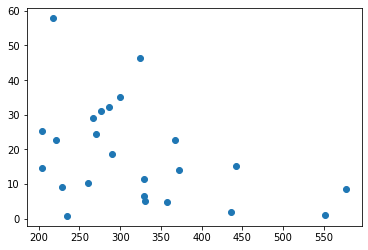

In [9]:
plt.scatter(ariana_averages_overall_df['Average Minutes between Notifications'], ariana_averages_overall_df['News Average'])

In [10]:
ariana_comparison_df = pd.DataFrame({
    "News Average": round(ariana_df['News'].groupby(ariana_df['News Day']).mean(), 2),
    "Fatigue Average": round(ariana_df['Fatigue'].groupby(ariana_df['News Day']).mean(), 2),
    "Depressed Mood Average": round(ariana_df['DeprMood'].groupby(ariana_df['News Day']).mean(), 2),
    "Loneliness Average": round(ariana_df['Loneliness'].groupby(ariana_df['News Day']).mean(),2),
    "Concentration Average": round(ariana_df['Concentrat'].groupby(ariana_df['News Day']).mean(), 2),
    "Loss of Interest Average": round(ariana_df['LossOfInt'].groupby(ariana_df['News Day']).mean(), 2),
    "Inferior Average": round(ariana_df['Inferior'].groupby(ariana_df['News Day']).mean(), 2),
    "Hopeless Average": round(ariana_df['Hopeless'].groupby(ariana_df['News Day']).mean(), 2),
    "Stress Average": round(ariana_df['Stress'].groupby(ariana_df['News Day']).mean(), 2),
    "PSMU Average": round(ariana_df['PSMU'].groupby(ariana_df['News Day']).mean(), 2),
    "Active Average": round(ariana_df['Active'].groupby(ariana_df['News Day']).mean(), 2)
})
ariana_comparison_df

,News Average,Fatigue Average,Depressed Mood Average,Loneliness Average,Concentration Average,Loss of Interest Average,Inferior Average,Hopeless Average,Stress Average,PSMU Average,Active Average
News Day,,,,,,,,,,,
Day of Manchester Bombing,19.88,36.57,15.46,14.41,34.50,27.17,10.33,14.34,29.7,32.31,16.85
Normal Days,20.22,38.96,13.59,13.11,28.27,27.59,10.04,13.04,23.1,34.55,18.83


In [29]:
ariana_sd_comparison_df = pd.DataFrame({
    "News S.D.": round(ariana_df['News'].groupby(ariana_df['News Day']).std(), 2),
    "Fatigue S.D.": round(ariana_df['Fatigue'].groupby(ariana_df['News Day']).std(), 2),
    "Depressed Mood S.D.": round(ariana_df['DeprMood'].groupby(ariana_df['News Day']).std(), 2),
    "Loneliness S.D.": round(ariana_df['Loneliness'].groupby(ariana_df['News Day']).std(),2),
    "Concentration S.D.": round(ariana_df['Concentrat'].groupby(ariana_df['News Day']).std(), 2),
    "Loss of Interest S.D.": round(ariana_df['LossOfInt'].groupby(ariana_df['News Day']).std(), 2),
    "Inferior S.D.": round(ariana_df['Inferior'].groupby(ariana_df['News Day']).std(), 2),
    "Hopeless S.D.": round(ariana_df['Hopeless'].groupby(ariana_df['News Day']).std(), 2),
    "Stress S.D.": round(ariana_df['Stress'].groupby(ariana_df['News Day']).std(), 2),
    "PSMU S.D.": round(ariana_df['PSMU'].groupby(ariana_df['News Day']).std(), 2),
    "Active S.D.": round(ariana_df['Active'].groupby(ariana_df['News Day']).std(), 2)
})
ariana_sd_comparison_df

,News S.D.,Fatigue S.D.,Depressed Mood S.D.,Loneliness S.D.,Concentration S.D.,Loss of Interest S.D.,Inferior S.D.,Hopeless S.D.,Stress S.D.,PSMU S.D.,Active S.D.
News Day,,,,,,,,,,,
Day of Manchester Bombing,23.51,27.63,22.03,20.31,28.40,26.50,15.08,20.74,29.60,29.23,22.5
Normal Days,25.51,28.73,19.46,19.47,25.05,26.78,16.13,19.31,24.98,29.14,24.5


Red columns are for 5/22/2017.
Teal columns are for all other days.


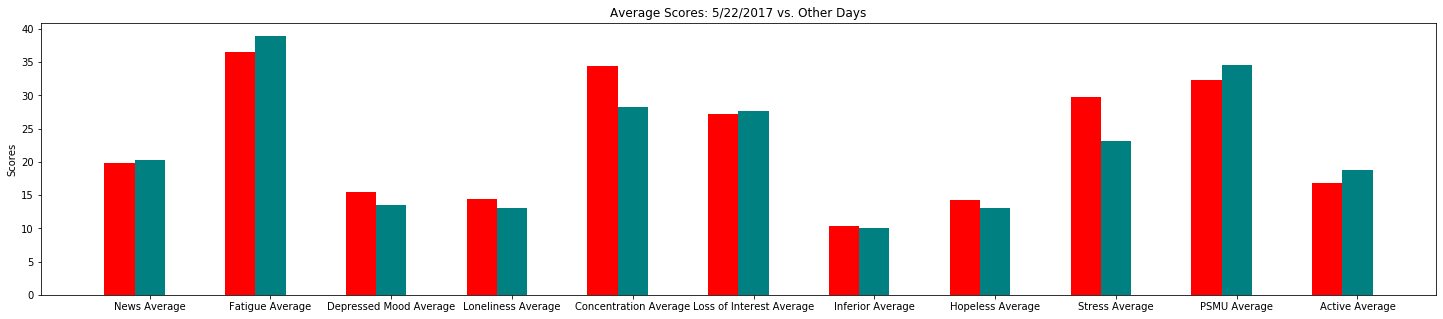

In [17]:
MB_values = []
ND_values = []
columns = list(ariana_comparison_df)
for x in columns:
    MB_values.append(ariana_comparison_df[x][0])
    ND_values.append(ariana_comparison_df[x][1])

width = 0.25
x1 = np.arange(len(columns))
x2 = [i + width for i in x1]

plt.figure(figsize=(25,5))
plt.bar(x1, MB_values, width=width, color="red")
plt.bar(x2, ND_values, width=width, color="teal")

plt.xticks([z + width for z in range(len(MB_values))], columns)
plt.ylabel('Scores')
plt.title('Average Scores: 5/22/2017 vs. Other Days')

print("Red columns are for 5/22/2017.")
print("Teal columns are for all other days.")
plt.show()

In [38]:
ariana_averages_df = pd.DataFrame({
    "Average Minutes between Notifications": avg_minutes_list,
    "News Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['News'].groupby(ariana_df['Participant']).mean(), 2),
    "News Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['News'].groupby(ariana_df['Participant']).mean(), 2),

    "Fatigue Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['Fatigue'].groupby(ariana_df['Participant']).mean(), 2),
    "Fatigue Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['Fatigue'].groupby(ariana_df['Participant']).mean(), 2),

    "Depressed Mood Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['DeprMood'].groupby(ariana_df['Participant']).mean(), 2),
    "Depressed Mood Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['DeprMood'].groupby(ariana_df['Participant']).mean(), 2),

    "Loneliness Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['Loneliness'].groupby(ariana_df['Participant']).mean(), 2),
    "Loneliness Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['Loneliness'].groupby(ariana_df['Participant']).mean(), 2),

    "Concentration Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['Concentrat'].groupby(ariana_df['Participant']).mean(), 2),
    "Concentration Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['Concentrat'].groupby(ariana_df['Participant']).mean(), 2),

    "Loss of Interest Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['LossOfInt'].groupby(ariana_df['Participant']).mean(), 2),
    "Loss of Interest Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['LossOfInt'].groupby(ariana_df['Participant']).mean(), 2),

    "Inferior Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['Inferior'].groupby(ariana_df['Participant']).mean(), 2),
    "Inferior Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['Inferior'].groupby(ariana_df['Participant']).mean(), 2),

    "Hopeless Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['Hopeless'].groupby(ariana_df['Participant']).mean(), 2),
    "Hopeless Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['Hopeless'].groupby(ariana_df['Participant']).mean(), 2),

    "Stress Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['Stress'].groupby(ariana_df['Participant']).mean(), 2),
    "Stress Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['Stress'].groupby(ariana_df['Participant']).mean(), 2),

    "PSMU Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['PSMU'].groupby(ariana_df['Participant']).mean(), 2),
    "PSMU Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['PSMU'].groupby(ariana_df['Participant']).mean(), 2),

    "Active Average (5/22/2017)": round(ariana_df[ariana_df['News Day'] == "Day of Manchester Bombing"]['Active'].groupby(ariana_df['Participant']).mean(), 2),
    "Active Average (Other Days)": round(ariana_df[ariana_df['News Day'] != "Day of Manchester Bombing"]['Active'].groupby(ariana_df['Participant']).mean(), 2)
})

ariana_averages_df.sort_values(by='Average Minutes between Notifications')

,Average Minutes between Notifications,News Average (5/22/2017),News Average (Other Days),Fatigue Average (5/22/2017),Fatigue Average (Other Days),Depressed Mood Average (5/22/2017),Depressed Mood Average (Other Days),Loneliness Average (5/22/2017),Loneliness Average (Other Days),Concentration Average (5/22/2017),...,Inferior Average (5/22/2017),Inferior Average (Other Days),Hopeless Average (5/22/2017),Hopeless Average (Other Days),Stress Average (5/22/2017),Stress Average (Other Days),PSMU Average (5/22/2017),PSMU Average (Other Days),Active Average (5/22/2017),Active Average (Other Days)
Participant,,,,,,,,,,,,,,,,,,,,,
680605,204,21.00,14.20,55.83,61.24,15.00,14.91,0.33,3.89,54.67,...,6.50,2.76,8.17,6.66,62.83,38.53,37.50,34.35,10.67,0.84
9076249,204,28.43,25.14,35.86,38.94,23.86,33.84,41.86,42.49,37.14,...,32.29,35.72,31.29,33.02,18.57,27.99,32.14,31.23,16.29,21.32
883656,217,72.29,56.62,32.86,32.28,18.71,17.61,24.43,18.41,19.29,...,20.71,18.94,23.57,18.80,25.14,28.37,95.00,55.63,27.86,36.84
7949149,221,29.50,22.27,27.67,41.02,4.17,5.27,10.83,3.28,27.83,...,0.00,1.09,1.33,5.04,6.17,14.02,29.50,37.62,30.33,24.04
5720405,228,0.00,9.76,61.25,35.20,36.75,25.21,22.75,17.61,46.50,...,19.75,19.94,13.00,16.40,73.50,30.96,6.50,27.30,0.00,7.06
5485419,235,0.00,0.91,25.33,30.74,0.17,0.04,0.00,0.09,2.17,...,0.00,0.01,0.00,3.82,15.00,9.07,5.00,20.28,0.00,4.24
9464374,261,0.00,11.27,51.43,48.52,14.43,3.10,2.43,4.31,37.86,...,0.29,3.55,3.14,2.93,36.86,15.66,0.43,18.88,0.00,10.15
5625691,267,41.67,27.95,19.83,12.64,0.00,1.74,0.17,1.47,15.67,...,1.17,3.06,3.33,3.85,6.33,4.74,57.50,52.76,63.50,58.56
3519030,270,18.00,25.02,49.00,51.52,42.83,23.69,48.67,40.17,66.00,...,39.50,19.11,57.33,34.58,61.17,32.66,29.83,48.31,29.17,27.75


In [39]:
ariana_averages_part1 = ariana_averages_df[['Average Minutes between Notifications', 'News Average (5/22/2017)', 'News Average (Other Days)', 'Fatigue Average (5/22/2017)', 'Fatigue Average (Other Days)', 'Depressed Mood Average (5/22/2017)', 'Depressed Mood Average (Other Days)', 'Loneliness Average (5/22/2017)', 'Loneliness Average (Other Days)', 'Concentration Average (5/22/2017)', 'Concentration Average (Other Days)', 'Loss of Interest Average (5/22/2017)', 'Loss of Interest Average (Other Days)']]

ariana_averages_part1.sort_values(by='Average Minutes between Notifications')

,Average Minutes between Notifications,News Average (5/22/2017),News Average (Other Days),Fatigue Average (5/22/2017),Fatigue Average (Other Days),Depressed Mood Average (5/22/2017),Depressed Mood Average (Other Days),Loneliness Average (5/22/2017),Loneliness Average (Other Days),Concentration Average (5/22/2017),Concentration Average (Other Days),Loss of Interest Average (5/22/2017),Loss of Interest Average (Other Days)
Participant,,,,,,,,,,,,,
680605,204,21.00,14.20,55.83,61.24,15.00,14.91,0.33,3.89,54.67,46.33,31.00,37.91
9076249,204,28.43,25.14,35.86,38.94,23.86,33.84,41.86,42.49,37.14,43.22,42.29,38.60
883656,217,72.29,56.62,32.86,32.28,18.71,17.61,24.43,18.41,19.29,21.55,21.29,25.12
7949149,221,29.50,22.27,27.67,41.02,4.17,5.27,10.83,3.28,27.83,14.67,29.00,13.54
5720405,228,0.00,9.76,61.25,35.20,36.75,25.21,22.75,17.61,46.50,34.61,52.50,38.94
5485419,235,0.00,0.91,25.33,30.74,0.17,0.04,0.00,0.09,2.17,17.08,18.50,30.95
9464374,261,0.00,11.27,51.43,48.52,14.43,3.10,2.43,4.31,37.86,22.96,23.14,27.76
5625691,267,41.67,27.95,19.83,12.64,0.00,1.74,0.17,1.47,15.67,8.48,4.17,4.14
3519030,270,18.00,25.02,49.00,51.52,42.83,23.69,48.67,40.17,66.00,39.94,59.17,46.94


In [40]:
ariana_averages_part2 = ariana_averages_df[['Average Minutes between Notifications', 'News Average (5/22/2017)', 'News Average (Other Days)', 'Inferior Average (5/22/2017)', 'Inferior Average (Other Days)', 'Hopeless Average (5/22/2017)', 'Hopeless Average (Other Days)', 'Stress Average (5/22/2017)', 'Stress Average (Other Days)', 'PSMU Average (5/22/2017)', 'PSMU Average (Other Days)', 'Active Average (5/22/2017)', 'Active Average (Other Days)']]

ariana_averages_part2.sort_values(by='Average Minutes between Notifications')

,Average Minutes between Notifications,News Average (5/22/2017),News Average (Other Days),Inferior Average (5/22/2017),Inferior Average (Other Days),Hopeless Average (5/22/2017),Hopeless Average (Other Days),Stress Average (5/22/2017),Stress Average (Other Days),PSMU Average (5/22/2017),PSMU Average (Other Days),Active Average (5/22/2017),Active Average (Other Days)
Participant,,,,,,,,,,,,,
680605,204,21.00,14.20,6.50,2.76,8.17,6.66,62.83,38.53,37.50,34.35,10.67,0.84
9076249,204,28.43,25.14,32.29,35.72,31.29,33.02,18.57,27.99,32.14,31.23,16.29,21.32
883656,217,72.29,56.62,20.71,18.94,23.57,18.80,25.14,28.37,95.00,55.63,27.86,36.84
7949149,221,29.50,22.27,0.00,1.09,1.33,5.04,6.17,14.02,29.50,37.62,30.33,24.04
5720405,228,0.00,9.76,19.75,19.94,13.00,16.40,73.50,30.96,6.50,27.30,0.00,7.06
5485419,235,0.00,0.91,0.00,0.01,0.00,3.82,15.00,9.07,5.00,20.28,0.00,4.24
9464374,261,0.00,11.27,0.29,3.55,3.14,2.93,36.86,15.66,0.43,18.88,0.00,10.15
5625691,267,41.67,27.95,1.17,3.06,3.33,3.85,6.33,4.74,57.50,52.76,63.50,58.56
3519030,270,18.00,25.02,39.50,19.11,57.33,34.58,61.17,32.66,29.83,48.31,29.17,27.75


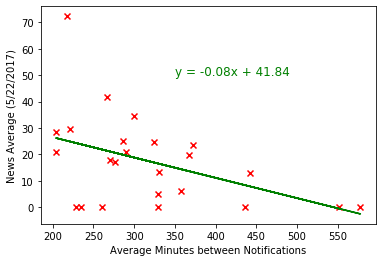

The correlation coefficient is -0.45.


In [41]:
x_val = ariana_averages_df['Average Minutes between Notifications']
y_val = ariana_averages_df['News Average (5/22/2017)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (350,50), fontsize=12, color="green")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("News Average (5/22/2017)")
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')

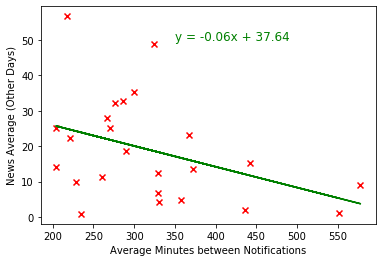

The correlation coefficient is -0.4.


In [42]:
x_val = ariana_averages_df['Average Minutes between Notifications']
y_val = ariana_averages_df['News Average (Other Days)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (350,50), fontsize=12, color="green")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("News Average (Other Days)")
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')

In [43]:
ariana_compact_df = ariana_averages_df[['Average Minutes between Notifications', 'Concentration Average (5/22/2017)', 'Concentration Average (Other Days)', 'Stress Average (5/22/2017)', 'Stress Average (Other Days)']]
ariana_compact_df.sort_values(by='Average Minutes between Notifications')

,Average Minutes between Notifications,Concentration Average (5/22/2017),Concentration Average (Other Days),Stress Average (5/22/2017),Stress Average (Other Days)
Participant,,,,,
680605,204,54.67,46.33,62.83,38.53
9076249,204,37.14,43.22,18.57,27.99
883656,217,19.29,21.55,25.14,28.37
7949149,221,27.83,14.67,6.17,14.02
5720405,228,46.50,34.61,73.50,30.96
5485419,235,2.17,17.08,15.00,9.07
9464374,261,37.86,22.96,36.86,15.66
5625691,267,15.67,8.48,6.33,4.74
3519030,270,66.00,39.94,61.17,32.66


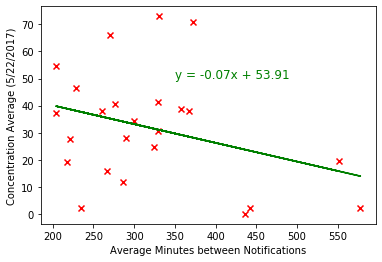

The correlation coefficient is -0.33.


In [44]:
x_val = ariana_compact_df['Average Minutes between Notifications']
y_val = ariana_compact_df['Concentration Average (5/22/2017)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (350,50), fontsize=12, color="green")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Concentration Average (5/22/2017)")
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')

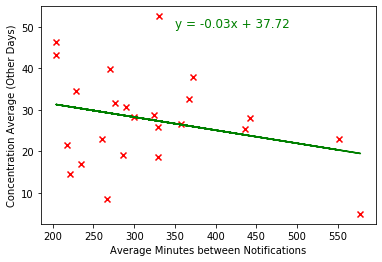

The correlation coefficient is -0.28.


In [45]:
x_val = ariana_compact_df['Average Minutes between Notifications']
y_val = ariana_compact_df['Concentration Average (Other Days)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (350,50), fontsize=12, color="green")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Concentration Average (Other Days)")
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')

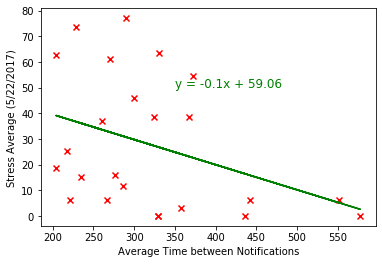

The correlation coefficient is -0.38.


In [30]:
x_val = ariana_compact_df['Average Minutes between Notifications']
y_val = ariana_compact_df['Stress Average (5/22/2017)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (350,50), fontsize=12, color="green")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Stress Average (5/22/2017)")
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')

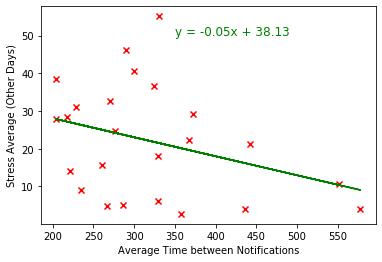

The correlation coefficient is -0.34.


In [31]:
x_val = ariana_compact_df['Average Minutes between Notifications']
y_val = ariana_compact_df['Stress Average (Other Days)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (350,50), fontsize=12, color="green")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Stress Average (Other Days)")
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')